In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import norm
from tqdm import tqdm
from func_list_vect import *
import json
v,args,cg_iter,nx,ny,dx,dy,np_,nu,X,Y,ip,iu,iv,idu,dt,p,u,qi,bcL,bcD,uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B=data_unloader(**json.load(open('/Users/moatasimfarooque/Documents/CFD/Moatasim_files/CFD/Project_3/data.json')))


In [2]:
v,args,cg_iter,nx,ny,dx,dy,np_,nu,X,Y,ip,iu,iv,idu,dt,p,u,qi,bcL,bcD,uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B=data_unloader(**json.load(open('/Users/moatasimfarooque/Documents/CFD/Moatasim_files/CFD/Project_3/data.json')))


In [ ]:
file='/Users/moatasimfarooque/Documents/CFD/Moatasim_files/CFD/Project_3/test_2.npy'
with open(file, 'rb') as f:
    qi= np.load(f,allow_pickle=True)
    uf= np.load(f,allow_pickle=True)
    u_new = np.load(f,allow_pickle=True)
    P = np.load(f,allow_pickle=True)

quant=u_new
u_vec=np.reshape(quant[0:iu[-1,-1]+1], (nx-1,ny), order='C')
new_row=np.zeros((1,ny))
u_vec=np.vstack([u_vec, new_row])

v_vec=np.reshape(quant[iu[-1,-1]+1:], (nx,ny-1), order='C')
new_row=np.zeros((nx,1))
v_vec=np.hstack([v_vec, new_row])
fig,ax=plt.subplots(1,1)
#cp = ax.contour(X, Y, curl_visual,cmap='coolwarm')
cp = ax.contourf(X, Y, u_vec)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
dict_saver=pd.read_csv('dict_saver.csv')

In [ ]:
X,Y=np.meshgrid(np.linspace(0,1,nx), np.linspace(0,1,ny), indexing='ij')
p_vec=np.reshape(P[0:ip[-1,-1]+1], (nx,ny), order='C')

fig,ax=plt.subplots(1,1)
#cp = ax.contour(X, Y, curl_visual,cmap='coolwarm')
cp = ax.contourf(X, Y, p_vec)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
new_row.shape

In [ ]:
nx,ny

In [ ]:
u_vec.shape

In [ ]:
u_vec=np.reshape(u_new[0:iu[-1,-1]+1], (nx-1,ny), order='C')
new_row=np.zeros((1,ny))
u_vec=np.vstack([u_vec, new_row])

v_vec=np.reshape(u_new[iu[-1,-1]+1:], (nx,ny-1), order='C')
new_row=np.zeros((nx,1))
v_vec=np.hstack([v_vec, new_row])
fig,ax=plt.subplots(1,1)
#cp = ax.contour(X, Y, curl_visual,cmap='coolwarm')
cp = ax.contourf(X, Y, v_vec)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
p=explicit_matrix(Adv_Vec,2,nu,args)

In [ ]:
matrix_A=[]
for i in range(nu):
    Q=np.zeros((nu,1))
    Q[i,0]=1
    pd.DataFrame(list(Adv_Vec(Q,*args)[:,0])).to_csv(f"/Users/moatasimfarooque/Documents/CFD/Moatasim_files/CFD/Project_3/Adv_Matrix/matrix_repr{i}.csv",index=False)

In [ ]:
s=pd.read_csv('/Users/moatasimfarooque/Documents/CFD/Moatasim_files/CFD/Project_3/Adv_Matrix/matrix_repr0.csv')

In [ ]:
indptr = [0]
indices = []
data = []
vocabulary = {}
for i in tqdm(range(5)):
    Q=np.zeros((5,1))
    Q[i,0]=1
    s=list(Adv_Vec(Q,*args)[:,0])
    for term in s:
        index = vocabulary.setdefault(term, len(vocabulary))
        indices.append(index)
        data.append(1)
    indptr.append(len(indices))

In [ ]:
mat = csr_matrix((data, indices, indptr), shape=(128, 128))

In [ ]:
iu.shape

In [ ]:
iv.shape

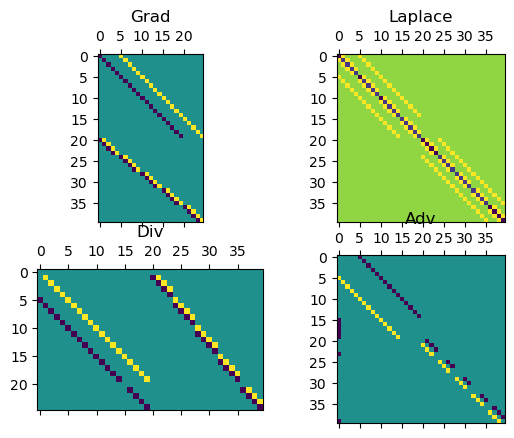

In [3]:
v,args,cg_iter,nx,ny,dx,dy,np_,nu,X,Y,ip,iu,iv,idu,dt,p,u,qi,bcL,bcD,uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B=data_unloader(**json.load(open('/Users/moatasimfarooque/Documents/CFD/Moatasim_files/CFD/Project_3/data.json')))
Operator=[[Grad_Vec],[Laplace_Vec],[Div_Vec],[Adv_Vec]]
Operator_names=['Grad','Laplace','Div','Adv']
nu_list=[np_,nu,nu,nu]
#args=np_,nu,nx,ny,dx,dy,iu,iv,ip,dt,v
fig, axs = plt.subplots(2, 2)
k=0
for i in range(2):
    for j in range(2):
        s=explicit_matrix_combo(Operator[k],nu_list[k],args)
        axs[i, j].matshow(s)
        axs[i, j].set_title(f"{Operator_names[k]}")
        k=k+1
plt.show()

In [46]:
lister=[]
for t in np.argwhere(s!=0):
    lister.append([t[0],t[1]])

In [80]:
for i in range(p.shape[0]-1):
    for j in range(p.shape[1]-1):
        p[i,j]=0
        if i>(p.shape[0]/2):
            
            if [i,j] in lister:

                p[i+1,j]=p[i,j]
                p[i-1,j]=-p[i,j]
                p[i,j+1]=p[i,j]
                p[i,j-1]=-p[i,j]
                p[i,j]=0
        
        


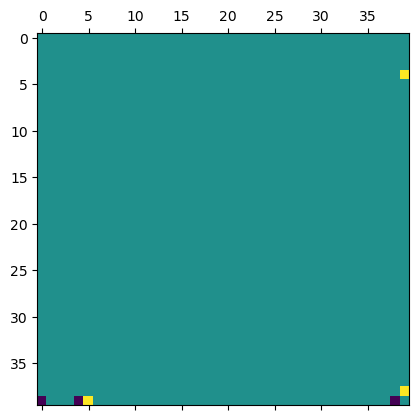

In [81]:
plt.matshow(p)

In [62]:
s

array([[-0.  , -0.  , -0.  , ..., -0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  , ..., -0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  , ..., -0.  , -0.  , -0.  ],
       ...,
       [-0.  , -0.  , -0.  , ..., -0.  , -1.25, -0.  ],
       [-0.  , -0.  , -0.  , ...,  1.25, -0.  , -1.25],
       [-1.25, -0.  , -0.  , ..., -0.  ,  1.25, -0.  ]])